In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
features = ['Annual Income (k$)','Spending Score (1-100)']
X = df[features].values

In [4]:
from sklearn.cluster import KMeans

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\abyji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abyji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abyji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abyji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

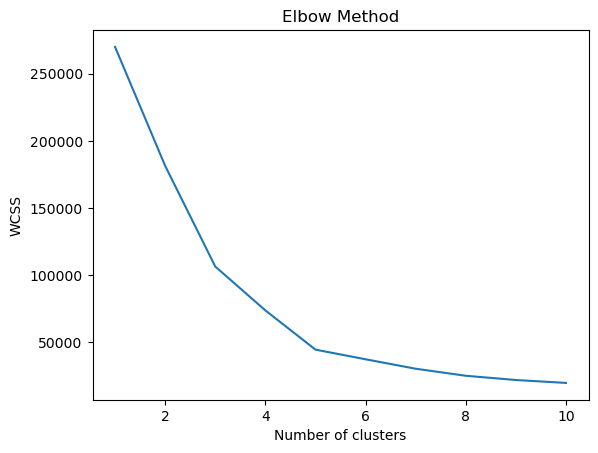

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=5)
y_means = kmeans.fit_predict(X)

C:\Users\abyji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abyji\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
for i in range(5):
    cluster_data = df[y_means == i]
    print(f"\nCluster {i+1} characteristics:")
   
    print(cluster_data[features].describe())


Cluster 1 characteristics:
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000

Cluster 2 characteristics:
       Annual Income (k$)  Spending Score (1-100)
count           23.000000               23.000000
mean            26.304348               20.913043
std              7.893811               13.017167
min             15.000000                3.000000
25%             19.500000                9.500000
50%             25.000000               17.000000
75%             33.000000               33.500000
max             39.000000               40.000000

Cluster 3 characteristics:
       Annual In

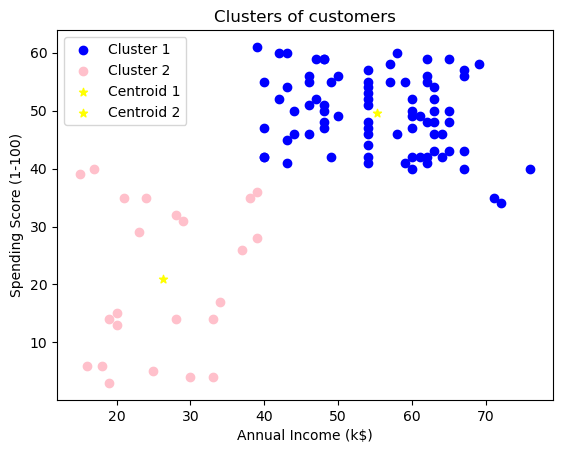

In [11]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue',label='Cluster 1')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='pink',label='Cluster 2')


centroids = kmeans.cluster_centers_


plt.scatter(centroids[0, 0], centroids[0, 1], marker='*', color='yellow', label='Centroid 1')
plt.scatter(centroids[1, 0], centroids[1, 1], marker='*', color='yellow', label='Centroid 2')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [12]:
df["Target"]=y_means

In [13]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


In [14]:
X=Clustered_df.iloc[:,1:5]
y=Clustered_df.iloc[:,-1]

In [15]:
y.head()

0    1
1    4
2    1
3    4
4    1
Name: Target, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
le=LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [21]:
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [22]:
gbdt.fit(X_train,y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.975

In [23]:
y_pred=gbdt.predict(X_test)
y_pred

array([0, 4, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 3, 0, 2, 3, 0, 2, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 0, 3, 0, 4, 1, 0, 0, 2, 0, 3, 3, 2, 0])

In [24]:
prediction = pd.DataFrame({'Original Value': y_test, 'Predicted Value': y_pred})

In [25]:
display(prediction)

,Original Value,Predicted Value
95,0,0
15,4,4
30,1,1
158,2,2
128,2,2
115,0,0
69,0,0
170,2,2
174,2,2
45,4,0
